In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('datasets/cars_moldova_updated.csv', sep=',')
display(df.head(5))
df.describe()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,10,19500.000000
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,7,19285.714286
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,9,12222.222222
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,15,13333.333333
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,21,14285.714286


,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
count,32018.000000,32018.000000,32018.000000,32018.000000,32018.000000,32018.000000
mean,2008.224093,182695.826535,1868.531108,9373.100974,12.775907,16677.043345
std,7.162391,96502.110023,610.716275,9419.287079,7.162391,8466.947870
min,1971.000000,1111.000000,200.000000,200.000000,1.000000,100.000000
25%,2004.000000,123000.000000,1500.000000,3550.000000,7.000000,11200.000000
50%,2009.000000,180000.000000,1800.000000,6700.000000,12.000000,15800.000000
75%,2014.000000,238000.000000,2000.000000,11999.000000,17.000000,21000.000000
max,2020.000000,1000000.000000,5000.000000,100000.000000,50.000000,50000.000000


# 1.  Выполните визуализацию данных с использованием библиотеки Pandas:

Text(0.5, 0.98, 'Средняя цена от марки автомабиля')

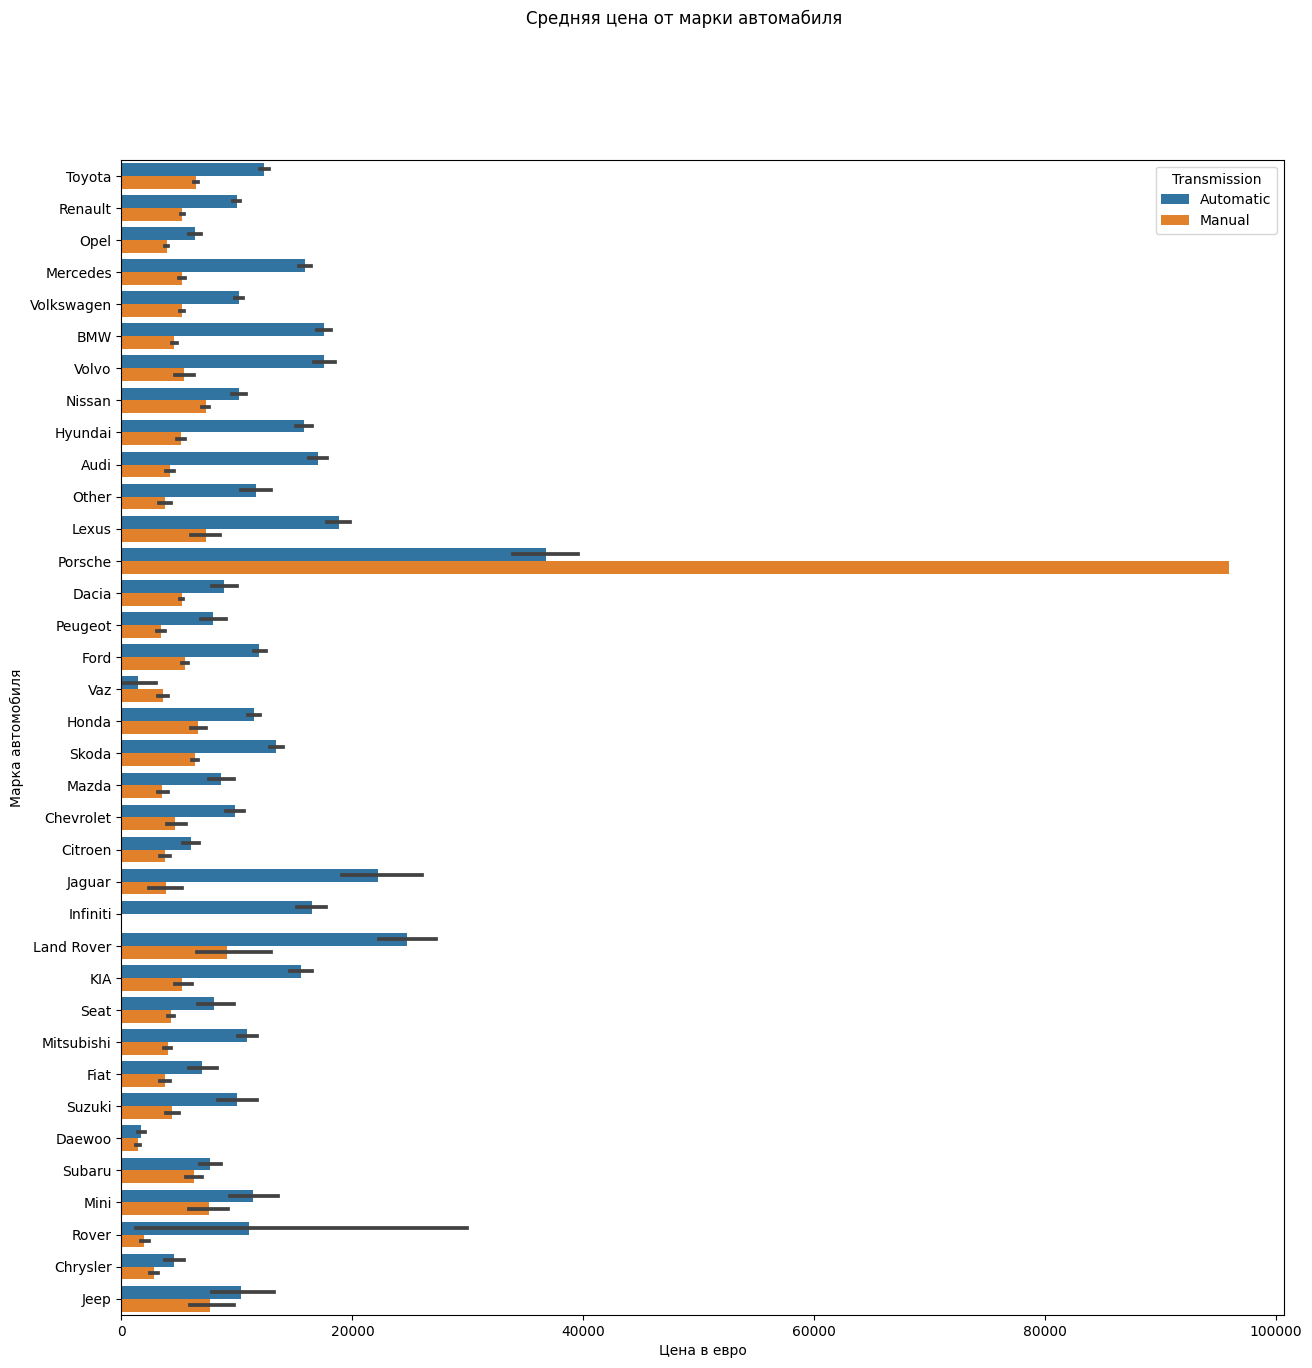

In [3]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.barplot(
    data=df,
    y='Make',
    x='Price(euro)',
    orient='h',
    ax=ax,
    hue='Transmission'
)
ax.set_xlabel('Цена в евро')
ax.set_ylabel('Марка автомобиля')
fig.suptitle('Средняя цена от марки автомабиля')

# Видим, что средняя цена по маркам может сильно варьироваться. И это надо учитывать, также как тот факт,
# что как правило авто с "автоматом" стоит дороже

Text(0.5, 0.98, 'Матрица зависимостей переменных друг от друга, в разрезе трансмиссии')

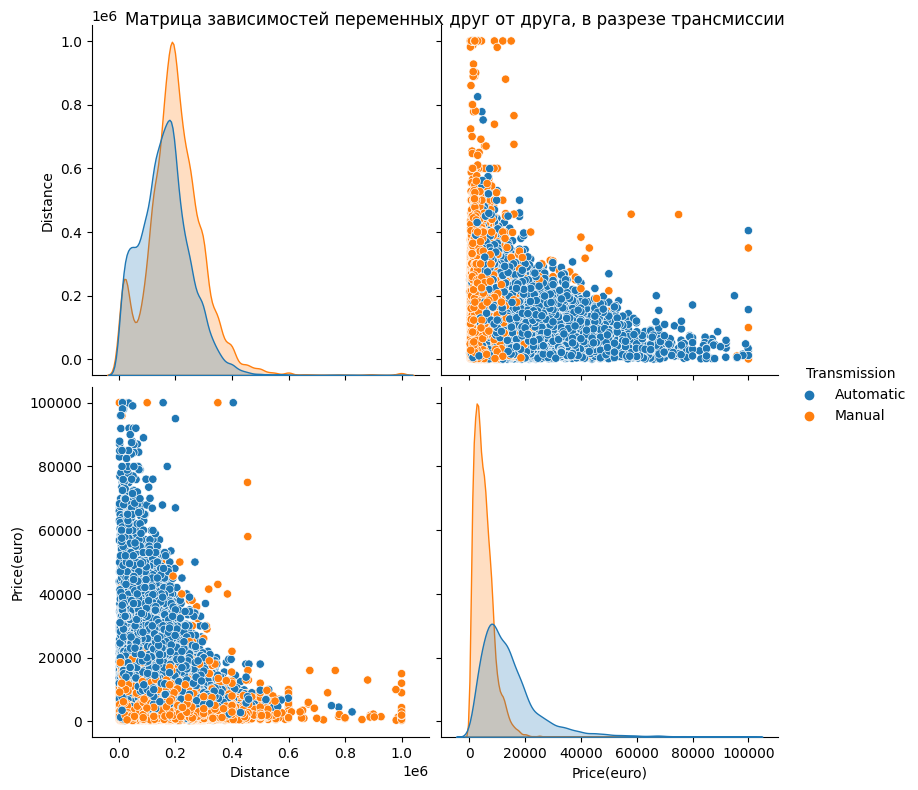

In [4]:
pair = sns.pairplot(
    data=df,
    hue='Transmission',
    vars=['Distance', 'Price(euro)'],
    height=4
)
plt.gcf().suptitle('Матрица зависимостей переменных друг от друга, в разрезе трансмиссии')

# Видим +- одинаковое распределение пробега
# Цена на авто с автоматической трансмиссией значительно выше, и разброс цен больше

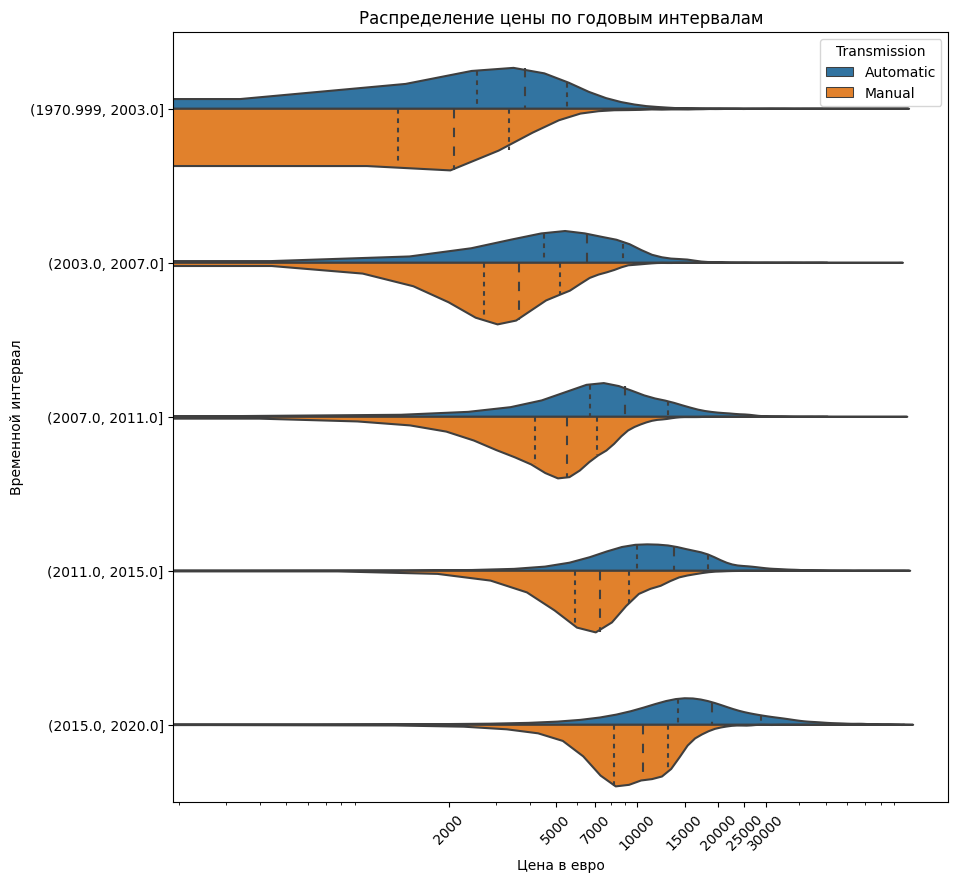

In [5]:
plt.figure(figsize=(10, 10))
X = pd.qcut(df['Year'], q=5)
Y = df['Price(euro)']
plot = sns.violinplot(
    y=X,
    x=Y,
    hue=df['Transmission'],
    orient='h',
    split=True,
    inner = "quartile"
)
plot.set_xscale('log')
plot.set_title('Распределение цены по годовым интервалам')
plot.set_xlabel('Цена в евро')
plot.set_ylabel('Временной интервал')
plot.set_xticks([2000, 5000, 7000, 10_000, 15_000, 20_000, 25_000, 30_000]);
plt.gca().get_xaxis().set_major_formatter(ticker.ScalarFormatter())
plt.gca().tick_params(axis='x', labelrotation=45)

# Можем увидеть постепенное увеличиние цены автомобиля в зависимости от года выпуска.
# При этом авто с автоматической трансмиссией имеют, стали дороже по отношению к ручной трансмиссии. 
# Это мы можем увидеть по смещений квартилей синего распределения вправо
# Первые распределения даже после очистики имеют выбросы в цене, это связано с логарифмическим скейлингом .

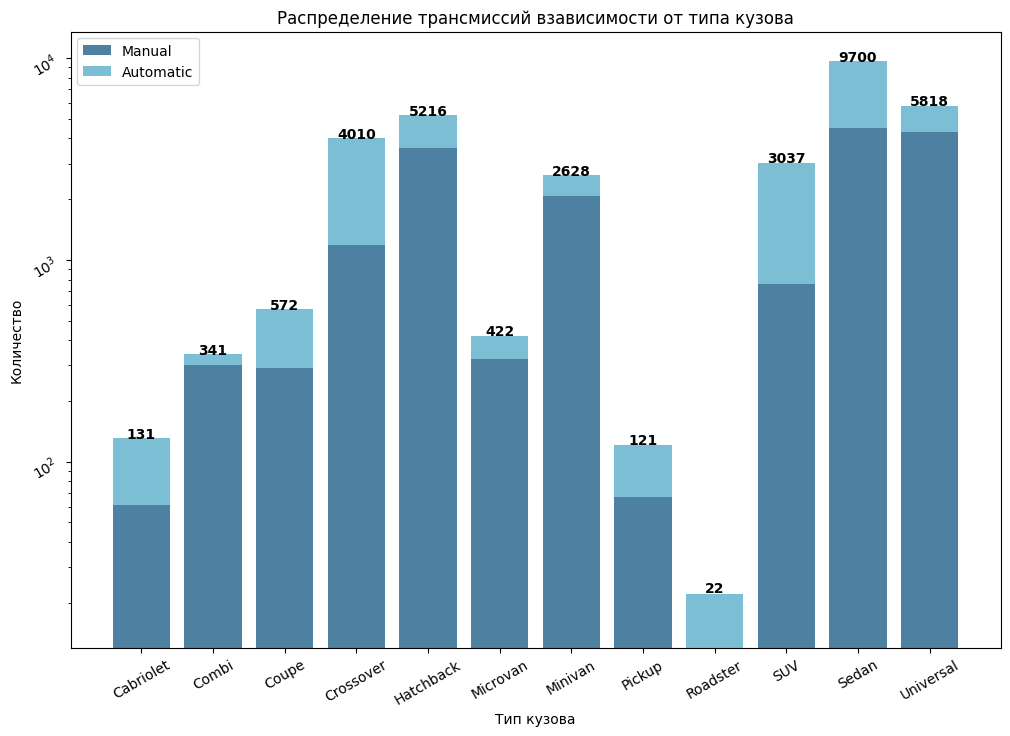

In [6]:
style_aggregation = df.groupby(by=['Style', 'Transmission'])['Transmission'].count()
style_aggregation_manual = style_aggregation.loc[pd.IndexSlice[:, 'Manual']]
style_aggregation_automatic = style_aggregation.loc[pd.IndexSlice[:, 'Automatic']]

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(style_aggregation_manual.index.get_level_values(0), 
       style_aggregation_manual, 
       color="#024b7a",
       label='Manual',
       alpha=0.7)

ax.bar(style_aggregation_manual.index.get_level_values(0), 
       style_aggregation_automatic, 
       bottom=style_aggregation_manual,
       label='Automatic',
       color="#44a5c2", alpha=0.7)

ax.set_yscale('log')

total_values = np.add(style_aggregation_automatic, style_aggregation_manual)

for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

ax.set_title('Распределение трансмиссий взависимости от типа кузова')
ax.set_xlabel('Тип кузова')
ax.set_ylabel('Количество')
ax.tick_params(rotation=30)
ax.legend()

# Смотрим на распределение трансмиссий в разрезе кузова
# В целом видно что никаких особеностей нет, везде преобладает автоматическая трансмиссия

# 2.  Попытайтесь добавить в модель дополнительные признаки на основе имеющихся:

In [7]:
df.corr(numeric_only=True)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
Year,1.000000,-0.432681,-0.026471,0.549258,-1.000000,0.500786
Distance,-0.432681,1.000000,0.070275,-0.342872,0.432681,0.360843
Engine_capacity(cm3),-0.026471,0.070275,1.000000,0.384268,0.026471,-0.008869
Price(euro),0.549258,-0.342872,0.384268,1.000000,-0.549258,0.239975
Age,-1.000000,0.432681,0.026471,-0.549258,1.000000,-0.500786
km_year,0.500786,0.360843,-0.008869,0.239975,-0.500786,1.000000


In [8]:
df['Distance_description'] = pd.qcut(df['Distance'], 
                                     q=3,
                                     labels=['с небольшим пробегом', 'со средним пробегом', 'с большим пробегом'])
# Описание общего пробега, разделенного по квартилям
df.sample(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_description
16725,Toyota,Verso-S,2012,Minivan,164879.0,1400.0,Diesel,Manual,6900.0,9,18319.888889,со средним пробегом
29752,Audi,A6,2000,Sedan,328000.0,2496.0,Diesel,Manual,3000.0,21,15619.047619,с большим пробегом
22313,Toyota,Avensis,2007,Sedan,259000.0,1995.0,Diesel,Manual,3850.0,14,18500.000000,с большим пробегом
18592,Honda,CR-V,2007,Crossover,197000.0,2204.0,Diesel,Manual,9700.0,14,14071.428571,со средним пробегом
10528,Volkswagen,Passat,2013,Sedan,223150.0,2000.0,Diesel,Manual,11700.0,8,27893.750000,с большим пробегом


In [9]:
# Разобьем все авто на редкие и частые
rare_models_mask = df['Model'].value_counts()
frequence = df['Model'].transform(lambda x: 'rare' if rare_models_mask[x] < 20 else 'frequent')

display(df['Price(euro)'].describe()) # Условимся, что меньше 5 тысяч дешевые авто, от 5 до 50 средние, >50 дорогие

def price_transformer(x):
    if x in range(100, 5001):
        return 'cheap'
    if x in range(5001, 50001):
        return 'mid'
    else:
        return 'expensive'

# Разобьем авто на три категории: дешевые, средние, дорогие
price_cat = df['Price(euro)'].transform(price_transformer)
df['Price_frequence'] = frequence + ' ' + price_cat

count     32018.000000
mean       9373.100974
std        9419.287079
min         200.000000
25%        3550.000000
50%        6700.000000
75%       11999.000000
max      100000.000000
Name: Price(euro), dtype: float64

In [10]:
# Проанализируем отлокнение каждого авто от средней цена на автомобиль такой же модели
mask = df['Price_frequence'].str.contains('frequent')
average_price = df[mask].groupby(by='Model')['Price(euro)'].mean()

mean_price_deviation = df[mask]['Model'].transform(lambda x: average_price[x])
df['mean_price_deviation'] = ((df[mask]['Price(euro)'] - mean_price_deviation) / mean_price_deviation).round(3)
df.sample(10)

# В принципе отражает поле Price_frequence. Где отклонение небольшое около 20%, машина средней ценовой категории
# Но эти данные не эквивалентные, тк категориальный признак был построен по медианному принципу

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_description,Price_frequence,mean_price_deviation
31309,Mercedes,B Class,2014,Hatchback,135000.0,1796.0,Diesel,Automatic,13990.0,7,19285.714286,с небольшим пробегом,frequent mid,0.213
11092,Renault,Megane,2013,Universal,191200.0,1500.0,Diesel,Manual,8299.0,8,23900.000000,со средним пробегом,frequent mid,0.478
2587,Lexus,NX Series,2015,Crossover,96000.0,2499.0,Hybrid,Automatic,26999.0,6,16000.000000,с небольшим пробегом,frequent mid,0.008
29633,Mitsubishi,Colt,2005,Hatchback,185000.0,1300.0,Petrol,Manual,2800.0,16,11562.500000,со средним пробегом,frequent cheap,-0.191
5405,Skoda,Fabia,2012,Universal,240000.0,1200.0,Diesel,Manual,5200.0,9,26666.666667,с большим пробегом,frequent mid,0.076
16402,Nissan,Patrol,2002,Crossover,205000.0,3000.0,Diesel,Automatic,10000.0,19,10789.473684,со средним пробегом,rare mid,NaN
27147,Volkswagen,Golf,2017,Hatchback,104000.0,1986.0,Petrol,Automatic,14000.0,4,26000.000000,с небольшим пробегом,frequent mid,1.445
31073,Toyota,Corolla Verso,2004,Minivan,200000.0,1800.0,Metan/Propan,Automatic,5900.0,17,11764.705882,со средним пробегом,frequent mid,0.052
13681,Volkswagen,Passat,2003,Universal,386000.0,1900.0,Diesel,Manual,4200.0,18,21444.444444,с большим пробегом,frequent cheap,-0.357
4452,Mercedes,E Class,2011,Sedan,128000.0,1800.0,Petrol,Automatic,14999.0,10,12800.000000,с небольшим пробегом,frequent mid,0.380


In [11]:
df.to_csv('datasets/enriched_df.csv', index=False)

# 3.  Выполните предварительную обработку данных. 

#### One hot encoding

In [12]:
one_hot_encoded_df = df.copy()

categorical_columns = []
for column in df.columns:
    if df[column].dtype == object or isinstance(df[column].dtype, pd.CategoricalDtype):
        categorical_columns.append(column)

for column in categorical_columns:
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, pd.get_dummies(df[column])], axis=1)

display(one_hot_encoded_df)
# 853 колонок 🤯

one_hot_encoded_df.to_csv('datasets/one_hot_encoded_df.csv', index=False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,...,Manual,с небольшим пробегом,со средним пробегом,с большим пробегом,frequent cheap,frequent expensive,frequent mid,rare cheap,rare expensive,rare mid
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,10,...,0,0,1,0,0,0,1,0,0,0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,7,...,1,1,0,0,0,0,1,0,0,0
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,9,...,1,1,0,0,0,0,1,0,0,0
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,15,...,1,0,1,0,1,0,0,0,0,0
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,21,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,5,...,0,1,0,0,0,0,1,0,0,0
32014,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,19,...,1,0,0,1,1,0,0,0,0,0
32015,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,6,...,1,1,0,0,0,0,1,0,0,0
32016,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,15,...,1,0,0,1,1,0,0,0,0,0


#### Ordinal encoding

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoded_df = df.copy()

encoder = OrdinalEncoder()
transformer = encoder.fit(ordinal_encoded_df[['Distance_description', 'Price_frequence']]);
ordinal_encoded = transformer.transform(ordinal_encoded_df[['Distance_description', 'Price_frequence']])
ordinal_encoded_df[['Distance_description', 'Price_frequence']] = ordinal_encoded.astype(np.int_) 
# трансформировали столбцы у которых множество возможных вариантом маленькое

display(ordinal_encoded_df)
ordinal_encoded_df.to_csv('datasets/ordinal_encoded_df.csv', index=False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_description,Price_frequence,mean_price_deviation
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,10,19500.000000,2,2,-0.063
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,7,19285.714286,1,2,0.218
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,9,12222.222222,1,2,0.446
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,15,13333.333333,2,0,-0.071
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,21,14285.714286,0,0,-0.562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,5,17600.000000,1,2,0.760
32014,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,19,11842.105263,0,0,-0.438
32015,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,6,14833.333333,1,2,0.484
32016,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,15,24666.666667,0,0,-0.315


#### Стандартизация

In [14]:
from sklearn.preprocessing import StandardScaler
standard_df = df.copy()

std_scaler = StandardScaler()
std_nor_exclude_list = ['Year', 'mean_price_deviation', 'Engine_capacity(cm3)'] # Поля, которые не нужно стандартизировать
num_columns = [column for column in df.columns if 
               column not in (categorical_columns + std_nor_exclude_list)] 
standard_df[num_columns] = std_scaler.fit_transform(standard_df[num_columns])
display(standard_df)

standard_df.to_csv('datasets/standard_df.csv', index=False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_description,Price_frequence,mean_price_deviation
0,Toyota,Prius,2011,Hatchback,0.127504,1800.0,Hybrid,Automatic,-0.172319,-0.387573,0.333414,со средним пробегом,frequent mid,-0.063
1,Renault,Grand Scenic,2014,Universal,-0.494254,1500.0,Diesel,Manual,-0.087386,-0.806434,0.308105,с небольшим пробегом,frequent mid,0.218
2,Renault,Laguna,2012,Universal,-0.753320,1500.0,Diesel,Manual,-0.299720,-0.527194,-0.526151,с небольшим пробегом,frequent mid,0.446
3,Opel,Astra,2006,Universal,0.179317,1600.0,Metan/Propan,Manual,-0.559828,0.310529,-0.394919,со средним пробегом,frequent cheap,-0.071
4,Mercedes,Vito,2000,Microvan,1.215580,2200.0,Diesel,Manual,-0.624590,1.148251,-0.282435,с большим пробегом,frequent cheap,-0.562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,Volkswagen,Passat,2016,Sedan,-0.981298,1800.0,Petrol,Automatic,0.225806,-1.085675,0.109009,с небольшим пробегом,frequent mid,0.760
32014,Land Rover,Freelander,2002,Crossover,0.438382,1800.0,Metan/Propan,Manual,-0.527978,0.869010,-0.571046,с большим пробегом,frequent cheap,-0.438
32015,Dacia,Logan Mcv,2015,Universal,-0.970935,1500.0,Diesel,Manual,-0.251945,-0.946055,-0.217757,с небольшим пробегом,frequent mid,0.484
32016,Mazda,6,2006,Combi,1.940964,2000.0,Diesel,Manual,-0.570445,0.310529,0.943640,с большим пробегом,frequent cheap,-0.315


#### Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
norm_df = df.copy()

normalizer = MinMaxScaler()
norm_df[num_columns] = normalizer.fit_transform(norm_df[num_columns])
display(norm_df) # Возможно для колонки Age нужно добавить вычитание из 1, кажется дополнение до единицы будет удобнее
norm_df['Age'] = 1 - norm_df['Age'] 
norm_df.to_csv('datasets/norm_df.csv', index=False)

norm_df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_description,Price_frequence,mean_price_deviation
0,Toyota,Prius,2011,Hatchback,0.194105,1800.0,Hybrid,Automatic,0.075651,0.183673,0.388778,со средним пробегом,frequent mid,-0.063
1,Renault,Grand Scenic,2014,Universal,0.134038,1500.0,Diesel,Manual,0.083667,0.122449,0.384483,с небольшим пробегом,frequent mid,0.218
2,Renault,Laguna,2012,Universal,0.109010,1500.0,Diesel,Manual,0.063627,0.163265,0.242930,с небольшим пробегом,frequent mid,0.446
3,Opel,Astra,2006,Universal,0.199110,1600.0,Metan/Propan,Manual,0.039078,0.285714,0.265197,со средним пробегом,frequent cheap,-0.071
4,Mercedes,Vito,2000,Microvan,0.299221,2200.0,Diesel,Manual,0.032966,0.408163,0.284283,с большим пробегом,frequent cheap,-0.562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,Volkswagen,Passat,2016,Sedan,0.086986,1800.0,Petrol,Automatic,0.113226,0.081633,0.350701,с небольшим пробегом,frequent mid,0.760
32014,Land Rover,Freelander,2002,Crossover,0.224138,1800.0,Metan/Propan,Manual,0.042084,0.367347,0.235313,с большим пробегом,frequent cheap,-0.438
32015,Dacia,Logan Mcv,2015,Universal,0.087987,1500.0,Diesel,Manual,0.068136,0.102041,0.295257,с небольшим пробегом,frequent mid,0.484
32016,Mazda,6,2006,Combi,0.369299,2000.0,Diesel,Manual,0.038076,0.285714,0.492318,с большим пробегом,frequent cheap,-0.315


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_description,Price_frequence,mean_price_deviation
0,Toyota,Prius,2011,Hatchback,0.194105,1800.0,Hybrid,Automatic,0.075651,0.816327,0.388778,со средним пробегом,frequent mid,-0.063
1,Renault,Grand Scenic,2014,Universal,0.134038,1500.0,Diesel,Manual,0.083667,0.877551,0.384483,с небольшим пробегом,frequent mid,0.218
2,Renault,Laguna,2012,Universal,0.109010,1500.0,Diesel,Manual,0.063627,0.836735,0.242930,с небольшим пробегом,frequent mid,0.446
3,Opel,Astra,2006,Universal,0.199110,1600.0,Metan/Propan,Manual,0.039078,0.714286,0.265197,со средним пробегом,frequent cheap,-0.071
4,Mercedes,Vito,2000,Microvan,0.299221,2200.0,Diesel,Manual,0.032966,0.591837,0.284283,с большим пробегом,frequent cheap,-0.562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,Volkswagen,Passat,2016,Sedan,0.086986,1800.0,Petrol,Automatic,0.113226,0.918367,0.350701,с небольшим пробегом,frequent mid,0.760
32014,Land Rover,Freelander,2002,Crossover,0.224138,1800.0,Metan/Propan,Manual,0.042084,0.632653,0.235313,с большим пробегом,frequent cheap,-0.438
32015,Dacia,Logan Mcv,2015,Universal,0.087987,1500.0,Diesel,Manual,0.068136,0.897959,0.295257,с небольшим пробегом,frequent mid,0.484
32016,Mazda,6,2006,Combi,0.369299,2000.0,Diesel,Manual,0.038076,0.714286,0.492318,с большим пробегом,frequent cheap,-0.315


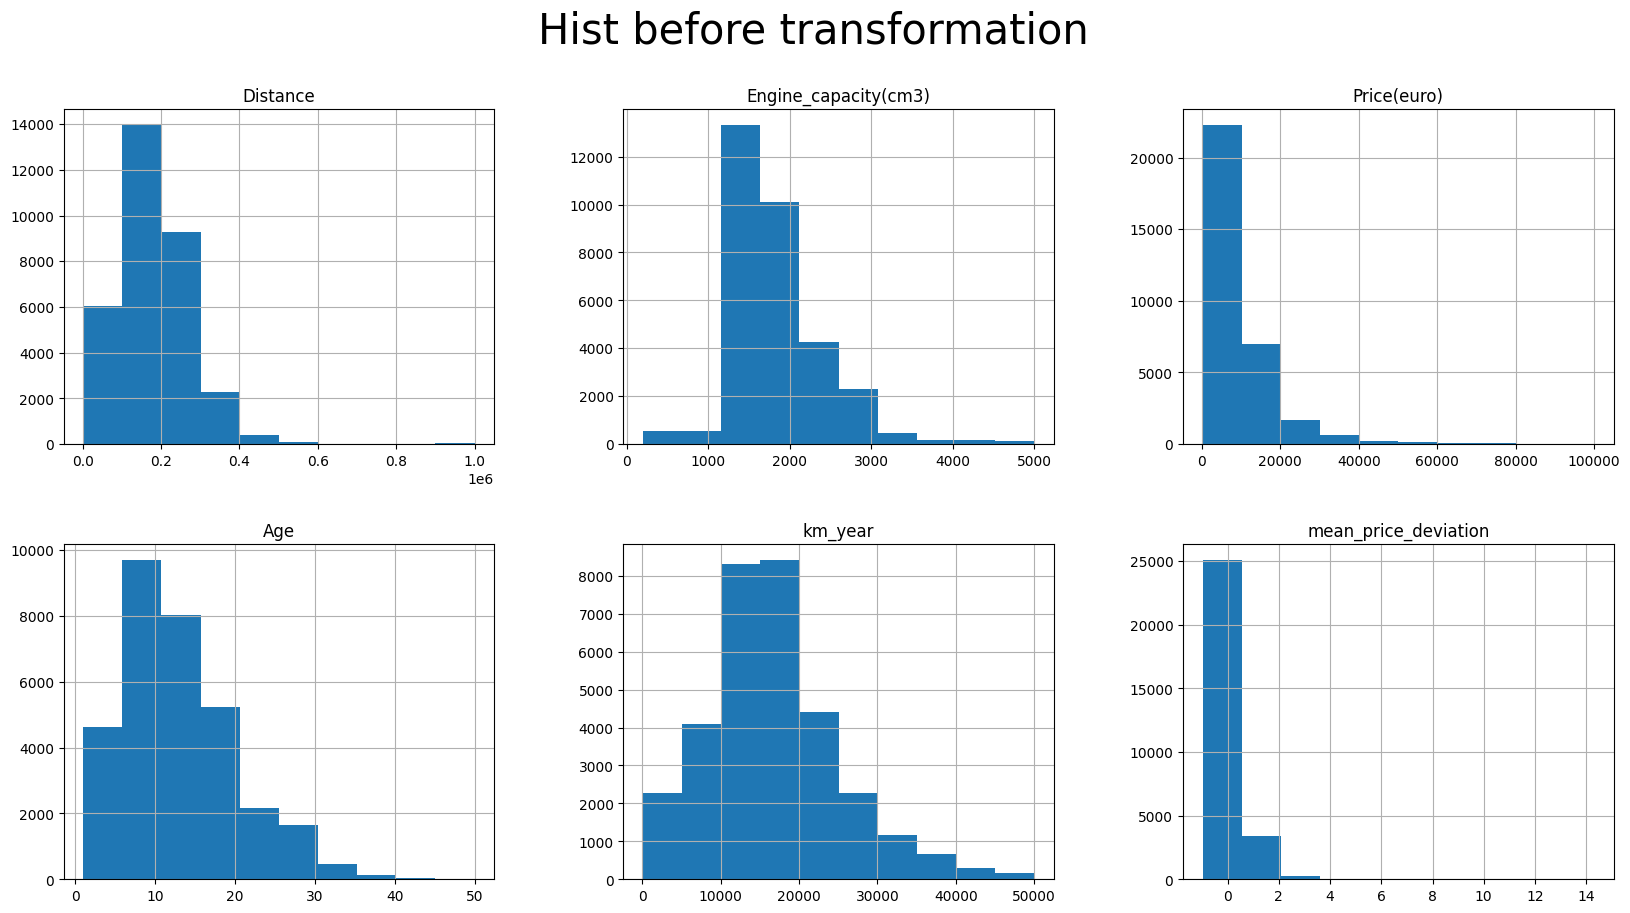

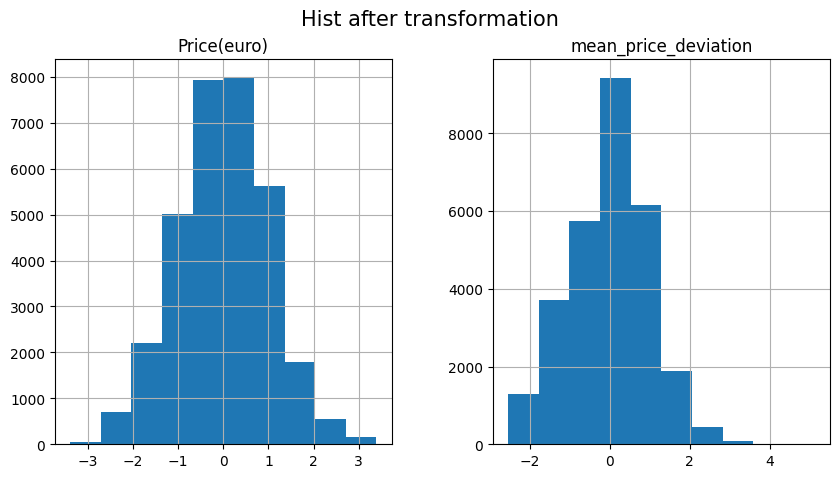

In [16]:
from sklearn.preprocessing import PowerTransformer

df.hist(column=['Distance','Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year', 'mean_price_deviation'],
        figsize = (20,10), 
        layout= (2,3))
plt.suptitle('Hist before transformation', fontsize=30)
# Следует нормализовать Price и mean_price. Не уверен, что за распределение у Distance и Age.

power_transformed_df = df.copy()
power_transformer = PowerTransformer()
cols_to_transform = ['Price(euro)', 'mean_price_deviation']
power_transformed_df[cols_to_transform] = power_transformer.fit_transform(df[cols_to_transform])



power_transformed_df.hist(column=cols_to_transform,
                          figsize = (10,5), 
                          layout= (1,2));
plt.suptitle('Hist after transformation', fontsize=15); # Теперь нормальное распределение

power_transformed_df.to_csv('datasets/norm_df.csv', index=False)